In [1]:
import pandas as pd

In [2]:
# Загружаем dataframe
df_winequality = pd.read_csv('datasets\\winequality-red.csv', sep=';')

In [3]:
df_winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Видно, что в датасете нет пропусков, категориальных признаков также нет
Посмотрим, как признаки скоррелированы между собой

In [5]:
df_winequality.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Отсюда видно, что сильная корреляция между какими-либо признаками отсутствует, поэтому перейдем к машинному обучению
Будем использовать дерево решений.

In [6]:
from sklearn.tree import DecisionTreeClassifier
try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

try:
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import StratifiedKFold

import matplotlib.pyplot as plt

In [7]:
X, y = df_winequality.iloc[:, :-1].values, df_winequality.iloc[:, -1].values

model = DecisionTreeClassifier(random_state=123)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=132)

train_scores, valid_scores = validation_curve(model, X, y, 
                                              'max_depth', range(1, 15),
                                              cv=cv, scoring='accuracy')

Исследуем влияние глубины дерева на модель, используя 5-fold кросс-валидацию в диапазоне от 1 до 15
Построим графики сравнения результатов на обучающем и тестовом множестве для двух разных метрик

Text(0,0.5,'accuracy')

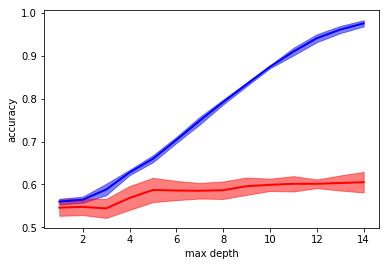

In [8]:
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

# Показывает разброс значений метрики Accuracy вокруг среднего значения в зависимости от глубины дерева на тестовом множестве
plt.fill_between(range(1,15), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
# Показывает разброс значений метрики Accuracy вокруг среднего значения в зависимости от глубины дерева на кросс-валидационном
# множестве
plt.fill_between(range(1,15), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1, 15), train_score_mean, c='b', lw=2)
plt.plot(range(1, 15), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('accuracy')

Text(0,0.5,'homogeneity_score')

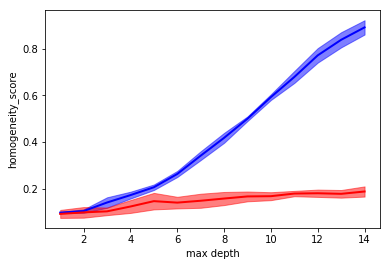

In [9]:
# Повторим процедуру для метрики "homogeneity_score"
train_scores, valid_scores = validation_curve(model, X, y, 
                                              'max_depth', range(1, 15),
                                              cv=cv, scoring='homogeneity_score')
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

# Показывает разброс значений метрики homogeneity_score вокруг среднего значения в зависимости от глубины дерева на тестовом множестве
plt.fill_between(range(1,15), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
# Показывает разброс значений метрики homogeneity_score вокруг среднего значения в зависимости от глубины дерева на кросс-валидационном
# множестве
plt.fill_between(range(1,15), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1, 15), train_score_mean, c='b', lw=2)
plt.plot(range(1, 15), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('homogeneity_score')

   Как видно по графикам, при достижении глубины в 5 уровней результаты предсказания на тестовом множестве неуклонно растут, 
в то время как на кросс-валидационном множестве этот рост затухает. Это говорит о том, что с дальнейшим ростом
числа уровней дерево теряет ключевую особенность алгоритмов ML - способность обобщаться ("вызубривает" обучающую выборку)

   Выполним теперь подбор гиперпараметров по методу случайного перебора. В пространство поиска включим следующие параметры: 
критерий, максимальная глубина, минимальное число объектов в листе, вес класса и минимальное количество объектов,
необходимое для разделения внутреннего узла. Количество запусков установим = 200

In [10]:
from scipy.stats import randint as randint
from scipy.stats import uniform

try:
    from sklearn.model_selection import RandomizedSearchCV
except ImportError:
    from sklearn.cross_validation import RandomizedSearchCV

In [11]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(5, 15),
    'min_samples_leaf': randint(5, 10),
    'class_weight': [None, 'balanced'],
    'min_samples_split': randint(2, 10)}

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

model = DecisionTreeClassifier(random_state=123)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=200, n_jobs=-1,
                                   cv=cv, scoring='accuracy', random_state=123)
# Наполняем модель данными и обучаем
random_search.fit(X, y)
# Выводим наилучшие значения параметров
random_search.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 8,
 'min_samples_split': 8}

In [12]:
# При этом наилучшее значение выбранной метрики (accuracy):
random_search.best_score_

0.6022514071294559

In [13]:
# Посмотрим, как должна выглядеть наилучшая в рамках выбранной метрики модель для нашей задачи
best_model = random_search.best_estimator_;
best_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [14]:
# Выведем важность признаков модели
imp = best_model.feature_importances_
pd.Series(index=df_winequality.columns[:-1], data = imp).sort_values()

fixed acidity           0.029092
density                 0.045796
chlorides               0.050399
free sulfur dioxide     0.054154
citric acid             0.055575
pH                      0.062060
residual sugar          0.078578
volatile acidity        0.085641
total sulfur dioxide    0.108922
sulphates               0.142378
alcohol                 0.287404
dtype: float64